In [31]:
import pandas as pd
import os

df = pd.read_csv('../data/03_casos/df_con_variables_sub_reg_nt_50-all.csv')
df


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,...,lag_3_semanas_defunciones_men5,lag_4_semanas_defunciones_men5,lag_5_semanas_defunciones_men5,lag_6_semanas_defunciones_men5,lag_1_semanas_defunciones_60mas,lag_2_semanas_defunciones_60mas,lag_3_semanas_defunciones_60mas,lag_4_semanas_defunciones_60mas,lag_5_semanas_defunciones_60mas,lag_6_semanas_defunciones_60mas
0,LIMA,YAUYOS,ALLAUCA,2021,47,50,151003,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LIMA,YAUYOS,ALLAUCA,2021,52,50,151003,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LIMA,YAUYOS,ALLAUCA,2022,43,50,151003,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LIMA,YAUYOS,ALLAUCA,2022,44,50,151003,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LIMA,YAUYOS,ALLAUCA,2023,14,50,151003,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,LIMA,YAUYOS,YAUYOS,2022,37,50,151001,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54295,LIMA,YAUYOS,YAUYOS,2023,10,50,151001,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54296,LIMA,CA�ETE,ZU�IGA,2005,24,50,150516,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54297,LIMA,CA�ETE,ZU�IGA,2006,44,50,150516,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54299 entries, 0 to 54298
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   departamento                         54299 non-null  object 
 1   provincia                            54299 non-null  object 
 2   distrito                             54299 non-null  object 
 3   ano                                  54299 non-null  int64  
 4   semana                               54299 non-null  int64  
 5   sub_reg_nt                           54299 non-null  int64  
 6   ubigeo                               54299 non-null  int64  
 7   ira_no_neumonia                      54299 non-null  int64  
 8   neumonias_men5                       54299 non-null  int64  
 9   neumonias_60mas                      54299 non-null  int64  
 10  hospitalizados_men5                  54299 non-null  int64  
 11  hospitalizados_60mas        

In [33]:
target = "hospitalizados_men5"
y = df[target]


In [34]:
X = df.drop(columns=[
    "departamento", "provincia", "distrito", "ubigeo", target
])


In [35]:
X = pd.get_dummies(X, drop_first=True)


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

target = "hospitalizados_men5"  # <-- change if needed

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = numeric_df.corr()

# Correlation with target only
corr_target = corr[target].sort_values(ascending=False)
print(corr_target.head(15))  # Top positively correlated
print(corr_target.tail(15))  # Top negatively correlated


hospitalizados_men5                    1.000000
neumonias_men5                         0.868564
lag_1_semanas_neumonias_men5           0.730481
lag_1_semanas_hospitalizados_men5      0.721112
lag_2_semanas_neumonias_men5           0.716238
lag_3_semanas_neumonias_men5           0.706074
lag_2_semanas_hospitalizados_men5      0.698402
lag_4_semanas_neumonias_men5           0.697758
ira_no_neumonia                        0.696873
lag_2_semanas_ira_no_neumonia          0.692501
lag_semana_anterior_ira_no_neumonia    0.692493
lag_3_semanas_hospitalizados_men5      0.691502
lag_3_semanas_ira_no_neumonia          0.687811
lag_5_semanas_neumonias_men5           0.685944
lag_4_semanas_hospitalizados_men5      0.683954
Name: hospitalizados_men5, dtype: float64
defunciones_men5                  0.113356
lag_5_semanas_defunciones_men5    0.076396
lag_4_semanas_defunciones_men5    0.074809
lag_6_semanas_defunciones_men5    0.073310
lag_1_semanas_defunciones_men5    0.070231
lag_3_semanas_defuncion

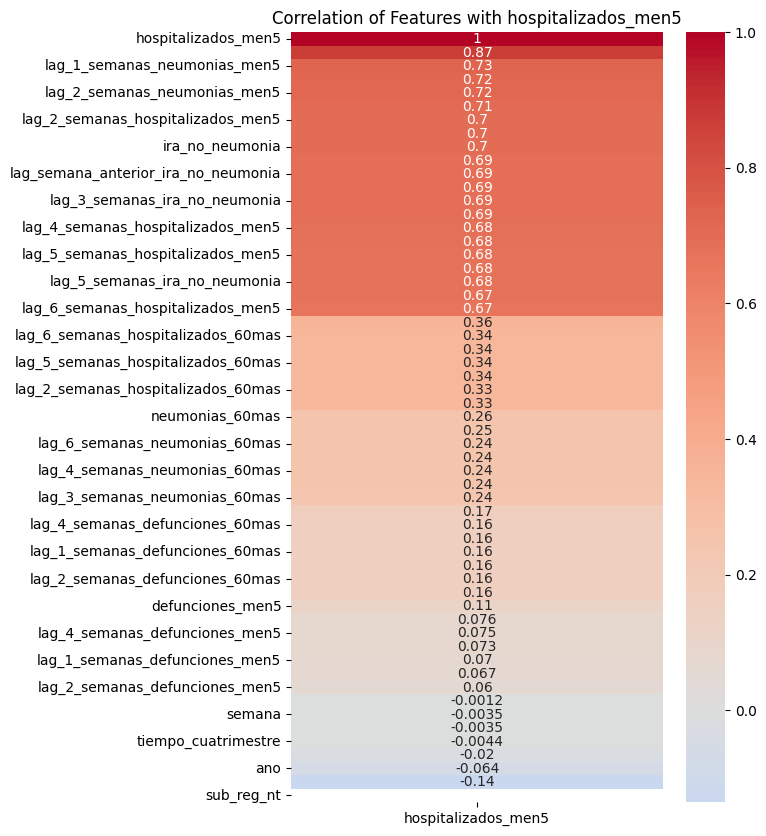

In [37]:
plt.figure(figsize=(6,10))
sns.heatmap(corr[[target]].sort_values(by=target, ascending=False),
            annot=True, cmap="coolwarm", center=0)
plt.title(f"Correlation of Features with {target}")
plt.show()
